In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
print(df.shape)

(545, 13)


In [7]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [8]:
print(df.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [10]:
from sklearn.preprocessing import LabelEncoder

In [13]:
lb = LabelEncoder()

In [14]:
l = [i for i in df.columns if(df[i].dtypes == 'object')]
print(l)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [16]:
for i in l :
    df[i] = lb.fit_transform(df[i])

In [17]:
print(df.dtypes)

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int32
guestroom           int32
basement            int32
hotwaterheating     int32
airconditioning     int32
parking             int64
prefarea            int32
furnishingstatus    int32
dtype: object


In [18]:
print(df.duplicated().sum())

0


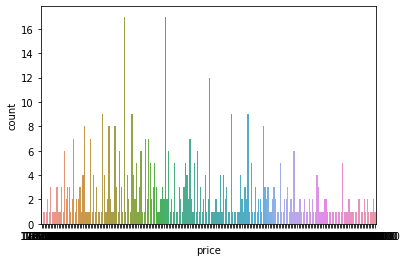

In [19]:
sns.countplot(x = df['price'])
plt.show()

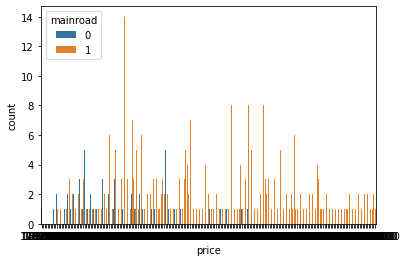

In [21]:
sns.countplot(x = df['price'],hue = df['mainroad'])
plt.show()

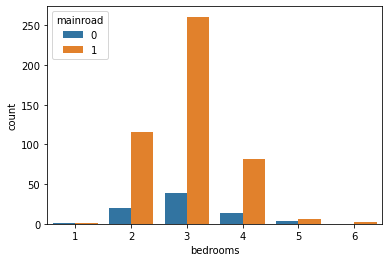

In [22]:
sns.countplot(x = df['bedrooms'],hue = df['mainroad'])
plt.show()

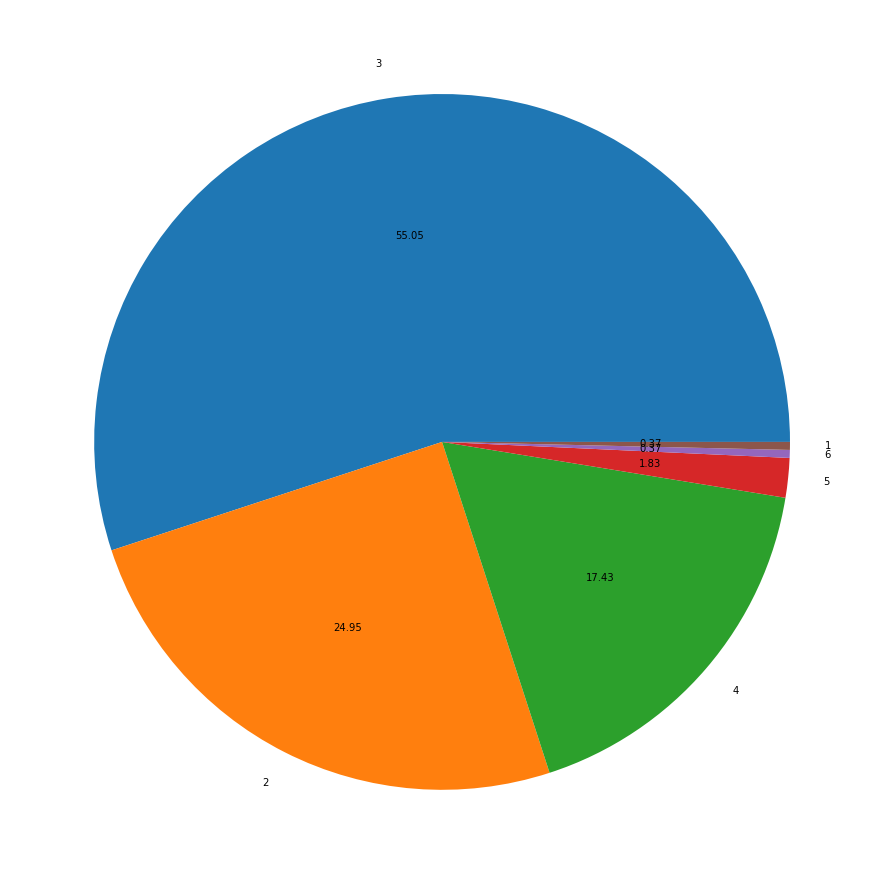

In [29]:
d1 = df['bedrooms'].value_counts()
plt.figure(figsize = (20,16))
plt.pie(x = d1,labels = d1.index,autopct = '%.2f')
plt.show()

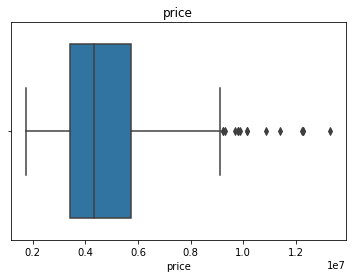

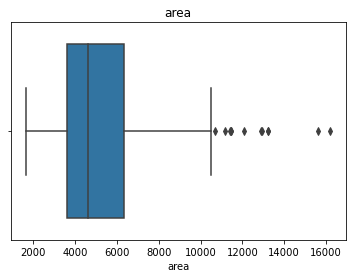

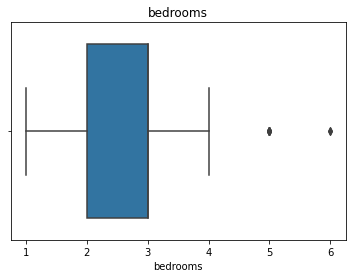

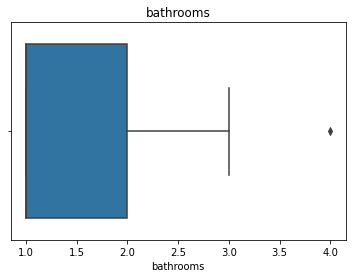

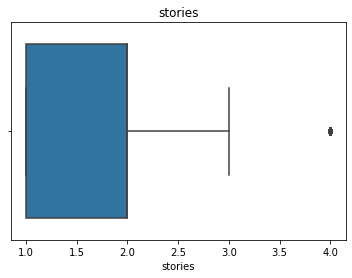

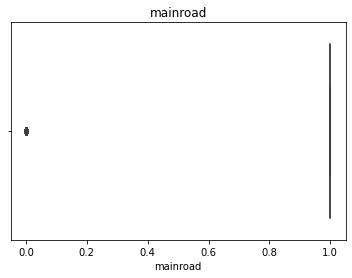

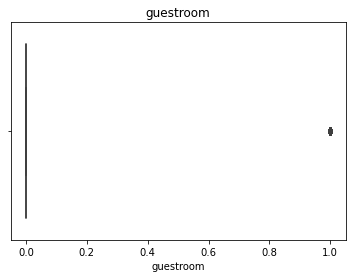

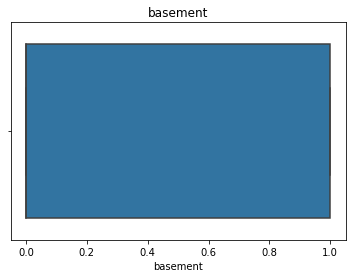

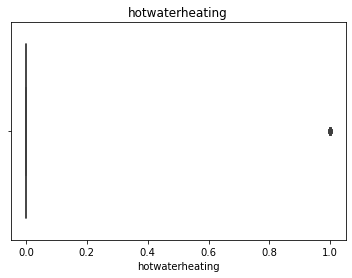

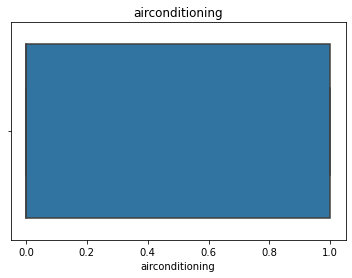

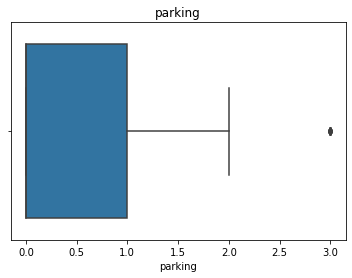

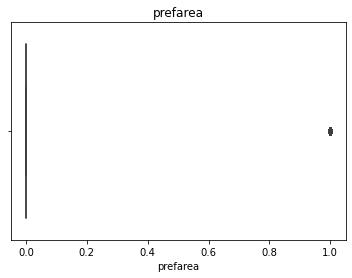

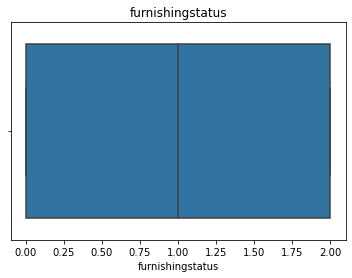

In [32]:
for i in df.columns :
    sns.boxplot(x = df[i])
    plt.title(i)
    plt.show()

In [44]:
df['price'].describe(percentiles = [0.03,0.97])



count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
3%       2.275000e+06
50%      4.340000e+06
97%      9.055200e+06
max      1.330000e+07
Name: price, dtype: float64

In [45]:
print(len(df[df['price'] > 9.055200e+06]))

17


In [46]:
df['price'] = np.where(df['price'] > 9.055200e+06,9.055200e+06,df['price'])

In [47]:
print(len(df[df['price']>9.055200e+06]))

0


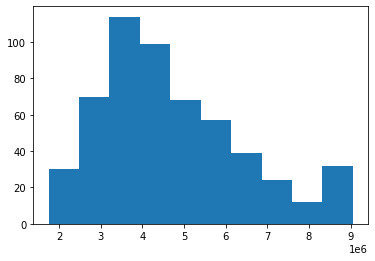

In [50]:
plt.hist(df['price'])
plt.show()

## Correlation  -
1) https://medium.com/analytics-vidhya/what-is-correlation-4fe0c6fbed47 learn from here. <br>
2) It gives the strength and direction of relationship between 2 or more variables.<br>
3) correlation varies between +1 and -1.<br>
4) Positive correlation between x and y - <br>
    a) if x increase then y also increases<br>
    b) if x decreases then y also decreases<br>
5) Negative correlation between x and y - <br>
    a) if x increases the y decreases<br>
    b) if x decreases the y increases<br>
6) corr formula=Corr(x,y)=(sum(xi-xmean)*(yi-ymean))/sqrt((sum((xi-xmean)^2))*(sum((yi-ymean)^2)))<br>
7) Corlation can only be computed for columns with int or float data type not for onject datatype<br>
8) corr(x,y) = corr(y,x) <br>
9) corr(x,x) = corr(y,y) = 1<br>

In [52]:
corr = df.corr()
print(corr)

                     price      area  bedrooms  bathrooms   stories  mainroad  \
price             1.000000  0.538968  0.367912   0.507503  0.432777  0.309981   
area              0.538968  1.000000  0.151858   0.193820  0.083996  0.288874   
bedrooms          0.367912  0.151858  1.000000   0.373930  0.408564 -0.012033   
bathrooms         0.507503  0.193820  0.373930   1.000000  0.326165  0.042398   
stories           0.432777  0.083996  0.408564   0.326165  1.000000  0.121706   
mainroad          0.309981  0.288874 -0.012033   0.042398  0.121706  1.000000   
guestroom         0.274589  0.140297  0.080549   0.126469  0.043538  0.092337   
basement          0.191866  0.047417  0.097312   0.102106 -0.172394  0.044002   
hotwaterheating   0.101793 -0.009229  0.046049   0.067159  0.018847 -0.011781   
airconditioning   0.463559  0.222393  0.160603   0.186915  0.293602  0.105423   
parking           0.372957  0.352980  0.139270   0.177496  0.045547  0.204433   
prefarea          0.328941  

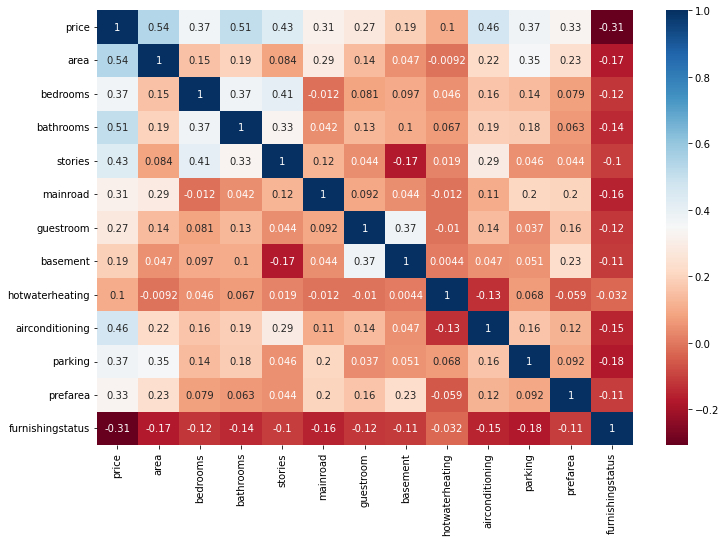

In [55]:
plt.figure(figsize = (12,8))
sns.heatmap(corr,annot = True,cmap = 'RdBu')
## heatmap is used to display a arectangular data in colour ecoded matrix
## annot = true will diplay the corr values in the cells of matrix
## cmap is used to map the data values to color space
## https://seaborn.pydata.org/generated/seaborn.heatmap.html learn from here
plt.show()

In [57]:
x = df.iloc[:,1:-1]
y = df['price']
print(x.shape)
print(y.shape)

(545, 11)
(545,)


In [56]:
from sklearn.model_selection import train_test_split 

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(408, 11)
(137, 11)
(408,)
(137,)


In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [76]:
def model_score(m) :
    print("Training Score : ",m.score(x_train,y_train))
    print("Testing Score : ",m.score(x_test,y_test))
def gen_met_reg(y_test,ypred_m) :
    mae = mean_absolute_error(y_test,ypred_m)
    mse = mean_squared_error(y_test,ypred_m)
    rmse = np.sqrt(mean_squared_error(y_test,ypred_m))
    r2 = r2_score(y_test,ypred_m)
    print("MAE : ",mae)
    print("MSE : ",mse)
    print("RMSE : ",rmse)
    print("R2 Score : ",r2)

In [77]:
m1 = LinearRegression()
m1.fit(x_train,y_train)

LinearRegression()

In [78]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[6141537.63118705 4972019.68184841 6944466.40999787 2954509.72583587
 3397187.11016474 6727581.01128942 3514280.52552461 4931080.11505445
 6909926.90263953 5569177.31662326 4831345.60432418 3534254.72349773
 5386585.61713869 4120298.1036001  3650962.77171601 6037203.29036936
 5495117.66299471 3022943.9498963  6727278.0291684  7200506.82346134
 3822708.67032042 2351151.94558935 4615989.63047022 5943577.90091105
 5482397.68650929 4665029.86340924 3029680.01340455 6323937.82949361
 6729426.83304055 3292617.38048633 3351918.31096723 4760991.36877121
 4998535.30007917 4136204.74965954 7027466.77802298 7553022.19305667
 5405941.39267906 6222570.51052777 3716042.73569993 7344181.17147133
 3806103.99351228 8687241.75133677 7828181.61205364 3263781.16685855
 3849166.62874988 5511526.3871283  6787420.34503511 3051873.56670801
 3801815.61613709 6413522.66525962 4003931.17197088 4784877.87778147
 3076979.16280414 3041845.63382388 3478277.58379768 6416788.00486722
 4668488.51396077 4661029.97619246

In [79]:
model_score(m1)

Training Score :  0.6579980195211119
Testing Score :  0.7469580809173422


In [80]:
gen_met_reg(y_test,ypred_m1)

MAE :  707872.2490506726
MSE :  800080876719.8896
RMSE :  894472.4013181679
R2 Score :  0.7469580809173422


In [81]:
m2 = DecisionTreeRegressor(criterion='mse',max_depth=8,min_samples_split=25) 
## here criterion will always be mse
m2.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_split=25)

In [82]:
ypred_m2 = m2.predict(x_test)
print(ypred_m2)

[6023500.         4867479.16666667 8155396.66666667 3373000.
 3373000.         8155396.66666667 3615208.33333333 4355521.73913043
 6627090.90909091 6440000.         4867479.16666667 3615208.33333333
 6023500.         3699333.33333333 4355521.73913043 6223943.47826087
 5593000.         3114192.30769231 6627090.90909091 6816693.33333333
 3373000.         2519743.33333333 4173166.66666667 6411300.
 5762093.75       4355521.73913043 3373000.         6223943.47826087
 6627090.90909091 4795700.         2931923.07692308 5762093.75
 3615208.33333333 4867479.16666667 6627090.90909091 8155396.66666667
 5593000.         6223943.47826087 3373000.         6223943.47826087
 3418203.7037037  8155396.66666667 8155396.66666667 3114192.30769231
 3615208.33333333 6816693.33333333 8155396.66666667 3373000.
 2931923.07692308 6223943.47826087 3615208.33333333 4867479.16666667
 2931923.07692308 3114192.30769231 3699333.33333333 6023500.
 4450090.90909091 6440000.         4000500.         3373000.
 8155396.66

In [83]:
model_score(m2)

Training Score :  0.6869958865208634
Testing Score :  0.6206462653925101


In [84]:
gen_met_reg(y_test,ypred_m2)

MAE :  848010.3561764205
MSE :  1199460032835.8247
RMSE :  1095198.627115568
R2 Score :  0.6206462653925101


In [85]:
m3=RandomForestRegressor(criterion='mse',max_depth=8,min_samples_split=25,n_estimators=60)
m3.fit(x_train,y_train)

RandomForestRegressor(max_depth=8, min_samples_split=25, n_estimators=60)

In [87]:
ypred_m3 = m3.predict(x_test)
print(ypred_m3)

[4986982.99256321 4859017.84469143 7688399.93249199 3339753.1358605
 3483153.95240664 7236316.52263564 3600018.56327663 4718106.10561913
 7030373.23127215 5769392.54056364 4654440.08255614 3578238.72369567
 5352605.72028915 4138008.88348307 4076416.72972948 6443136.90413961
 5710735.03645558 3478890.3356634  7056727.92573678 6323398.96078442
 3558268.33785182 2732053.72868686 4027531.66327863 5234443.66034944
 5625583.57814607 4355581.8633875  3379525.94286749 6708722.61586383
 6954335.85760713 3745582.07122976 3011981.10944077 5420822.83551394
 4581168.0291249  4510842.71761861 6971473.89459408 7793565.90771851
 5382280.41950514 6636028.40801979 3774096.29847618 6958912.94914041
 4286009.80636743 7628185.53555005 7456396.05095253 3003500.64726724
 3810003.17067046 5924335.96831093 7330581.11329183 3396117.31068358
 3621775.16264838 6243386.23864352 3646079.40717458 4692011.80044296
 2893239.61551968 3062053.60093103 4238612.40146886 5988223.68735626
 4225876.74281368 4802369.02931125 

In [88]:
model_score(m3)

Training Score :  0.7025908226966271
Testing Score :  0.7079722058499209


In [89]:
gen_met_reg(y_test,ypred_m3)

MAE :  756485.8514169172
MSE :  923348409691.1576
RMSE :  960910.1985571584
R2 Score :  0.7079722058499209
